In [1]:
%matplotlib inline

# Removing All Feedback

In this notebook we will construct an example model and evaluate the frequency of developmental errors when all repression is lost. The resultant figure panels are analogous to those labeled Figs. 6A and 6B in our manuscript.

### Setting up and running the simulation

First we must import both a `LinearModel` and a `ConditionSimulation` object from the `gram` package.

In [1]:
from gram.models.linear import LinearModel
from gram.simulation.environment import ConditionSimulation

Next we need to define our model along with the feedback strengths for each repressor. These are equivalent to $\eta_1$, $\eta_2$, and $\eta_3$ as defined in the manuscript. For our example model, we will assume a cell contains two of each repressor type, with all repressors subject to perturbation. 

In [6]:
eta = (5e-4, 1e-4, 5e-4)

# define model (both sets of repressors marked as)
model = LinearModel(g1=0.01, g2=0.001)
model.add_feedback(*eta, perturbed=True)
model.add_feedback(*eta, perturbed=True)

We then use the `ConditionSimulation.run` method to run the simulation under each metabolic condition.

In [4]:
# run simulation
simulation = ConditionSimulation(model)
simulation.run(skwargs=dict(N=5000))

### Generating the figure

Upon completing a simulation, instances of `ConditionSimulation` acquire a `comparisons` attribute. This is a dictionary of `Comparison` objects keyed by metabolic condition. Each comparison object contains `reference` and `compared` attributes, which are `genessa.TimeSeries` instances containing the simulated dynamics before and after the repressors are removed. Error frequencies are accessible via the `Comparison.threshold_error` attribute.

The function below will add a randomly sampled subset of trajectories simulated before and after the repressors are removed to a predefined axis.

In [30]:
import numpy as np
import matplotlib.pyplot as plt

def plot_trajectories(comparison, ax, N=10):
    """ Plot <N> trajectories from each condition in <comparison> on <ax>. """
    
    # plot <N> randomly selected trajectories before and after all repression is removed
    ind = np.random.randint(0, comparison.reference.states.shape[0], N)
    for trajectory in comparison.reference.states[ind, -1, :]:
        ax.plot(comparison.t, trajectory, color='m', lw=0.5)
    for trajectory in comparison.compared.states[ind, -1, :]:
        ax.plot(comparison.t, trajectory, color='grey', lw=0.5)
    
    # format axis
    ax.set_ylabel('Protein level')
    ax.set_xlabel('Time (h)')
    ax.set_xlim(-2, 50)

# Fig. 6A

Error frequency: 99.00%


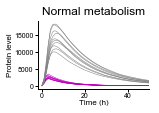

In [32]:
# get comparison simulated under normal metabolic conditions
comparison = simulation.comparisons['normal']

# plot simulated dynamics
fig_6A, ax = plt.subplots(figsize=(2., 1.25))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_title('Normal metabolism')
plot_trajectories(comparison, ax)

# report error frequency
print('Error frequency: {:2.2%}'.format(comparison.threshold_error))

# Fig. 6B

Error frequency: 98.32%


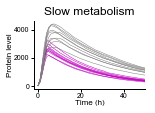

In [33]:
# get comparison simulated under slow metabolic conditions
comparison = simulation.comparisons['diabetic']

# plot simulated dynamics
fig_6B, ax = plt.subplots(figsize=(2., 1.25))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_title('Slow metabolism')
plot_trajectories(comparison, ax)

# report error frequency
print('Error frequency: {:2.2%}'.format(comparison.threshold_error))

In general, error frequencies remain high when the lost repressor is strong relative to both the retained repressors and intrinsic degradation kinetics, e.g. when $\eta_{removed} >> (\eta_{retained} + \gamma)$